In [16]:
using NetCDF, PyPlot, BitInformation

In [ ]:
using NetCDF, PyPlot, BitInformation                         # Load packages
ncfile = NetCDF.open("PAAAA2025021500+012.nc")  # Load ncfile for temperature
T = ncfile.vars["ta"][:,:,end]                          # Retrieve surface layer only
q = ncfile.vars["q"][:,:,end]   
CO2 = ncfile.vars["co2"][:,:,end]                            # Retrieve one vertical layer

bitinf_T = bitinformation(vec(T))                          # Temperature: calculate bitinformation in longitude
bitinf_q = bitinformation(vec(q))                          # Water vapour: calculate bitinformation in longitude
bitinf_CO2 = bitinformation(vec(CO2))                      # Water vapour: calculate bitinformation in longitude

bitinf_rand = bitinformation(randn(Float32,100000));         # Bitwise information for random N(0,1)

Dict{String, NcVar} with 42 entries:
  "lat"     => 1946-element NcVar{Float32, 1, 5}
  "cldhigh" => 3600×1946 NcVar{Float32, 2, 5}
  "hfls"    => 3600×1946 NcVar{Float32, 2, 5}
  "time"    => 0-dimensional NcVar{Int32, 0, 4}
  "hurs"    => 3600×1946 NcVar{Float32, 2, 5}
  "wsi"     => 3600×1946 NcVar{Float32, 2, 5}
  "prcl3h"  => 3600×1946 NcVar{Float32, 2, 5}
  "uas"     => 3600×1946 NcVar{Float32, 2, 5}
  "wpi"     => 3600×1946 NcVar{Float32, 2, 5}
  "lon"     => 3600-element NcVar{Float32, 1, 5}
  "ts"      => 3600×1946 NcVar{Float32, 2, 5}
  "rlds"    => 3600×1946 NcVar{Float32, 2, 5}
  "cldtot"  => 3600×1946 NcVar{Float32, 2, 5}
  "weasd"   => 3600×1946 NcVar{Float32, 2, 5}
  "rhump"   => 3600×1946×27 NcVar{Float32, 3, 5}
  "hfss"    => 3600×1946 NcVar{Float32, 2, 5}
  "prcliq"  => 3600×1946 NcVar{Float32, 2, 5}
  "pblh"    => 3600×1946 NcVar{Float32, 2, 5}
  "wp"      => 3600×1946 NcVar{Float32, 2, 5}
  ⋮         => ⋮

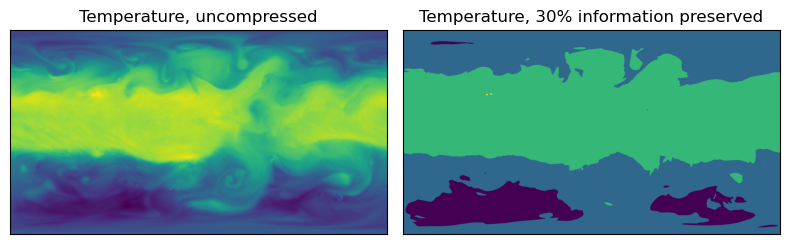

In [33]:
keepbits_T = argmax(cumsum(bitinf_T)/sum(bitinf_T) .>= 0.25) - 9    # subtract 9 to count mantissa bits
T_99 = round(T,keepbits_T)
fig,(ax1,ax2) = subplots(1,2,figsize=(8,4),sharex=true,sharey=true)
ax1.imshow(T')
ax2.imshow(T_99')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Temperature, uncompressed")
ax2.set_title("Temperature, 30% information preserved")
tight_layout()

display(gcf())

In [36]:
using BitInformation, PyPlot,ColorSchemes
using StatsBase, Statistics
using NetCDF
using ZfpCompression
using TranscodingStreams, CodecZstd

In [37]:
# initialise compression methods with varying levels
# 3: weak compression but fast, ...,
# 22: strongest compression but slow
ZstdCompressorL3 = ZstdCompressor(level=3)
TranscodingStreams.initialize(ZstdCompressorL3)

ZstdCompressorL10 = ZstdCompressor(level=10)
TranscodingStreams.initialize(ZstdCompressorL10)

ZstdCompressorL12 = ZstdCompressor(level=12)
TranscodingStreams.initialize(ZstdCompressorL12)

ZstdCompressorL22 = ZstdCompressor(level=22)
TranscodingStreams.initialize(ZstdCompressorL22)

In [ ]:
ncfile = NetCDF.open("")